Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

In [21]:
correlation = df.select_dtypes(include=['number']).corr()['left']
correlation # number of project, average_monthly_hours and time spend company has correlation between left

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

# Visualization

2. Plot bar charts showing impact of employee salaries on retention

<BarContainer object of 3 artists>

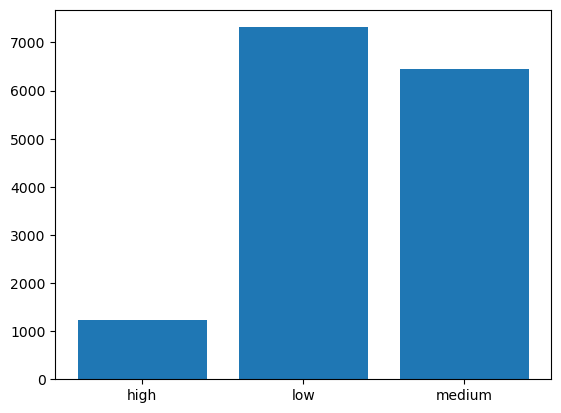

In [75]:
x = df.groupby(['salary'])[df.columns[0]].count() # series containing number of people in each salary class with salary class as index
plt.bar(x.index, x) # bar chart representing number of ppl at each salary class

In [96]:
y = df[df['left']==1].groupby(['salary'])[df.columns[0]].count() # series giving how many left in each salary class
y

salary
high        82
low       2172
medium    1317
Name: satisfaction_level, dtype: int64

In [100]:
z = y/x*100 # percentage of each salary class left
z

salary
high       6.628941
low       29.688354
medium    20.431275
Name: satisfaction_level, dtype: float64

<BarContainer object of 3 artists>

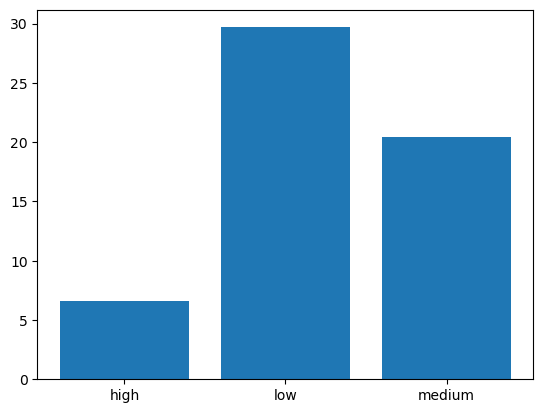

In [102]:
plt.bar(z.index, z) # bar chart showing impact of employee salaries on retention

3. Plot bar charts showing corelation between department and employee retention

In [108]:
x = df.groupby(['Department'])[df.columns[0]].count() # series containing number of people in each department class with department class as index
x

Department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

In [114]:
y = df[df['left']==1].groupby(['Department'])[df.columns[0]].count() # series giving how many left in each department class
y

Department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: satisfaction_level, dtype: int64

In [116]:
z = y/x*100 # percentage of each department class left
z

Department
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: satisfaction_level, dtype: float64

<BarContainer object of 10 artists>

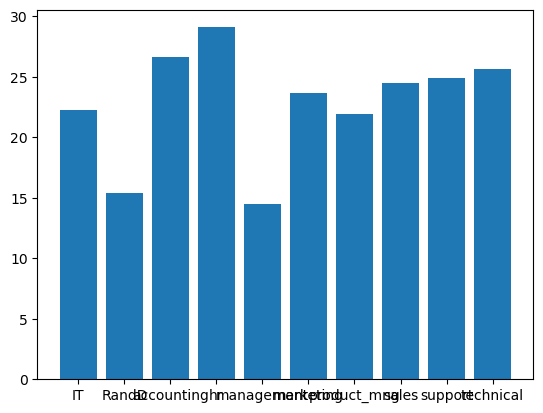

In [118]:
plt.bar(z.index, z) # bar chart showing corelation between department and employee retention

4. Now build logistic regression model using variables that were narrowed down in step 1

# Model Creation

In [178]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# Test Train split

In [181]:
x_features = df[['number_project','average_montly_hours','time_spend_company']]
y_label = df['left']

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features,y_label,test_size=0.1)

# Model Training

In [186]:
LR.fit(x_train,y_train)

LogisticRegression()

# Model Testing

In [189]:
LR.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

5. Measure the accuracy of the model

# Accuracy Score

In [192]:
LR.score(x_test,y_test) # above 75% accurate

0.7493333333333333